- **Purpose:** To follow the tutorial on multiomics pathway enrichment analysis using ActivePathways package in R
- **Date:** August 26, 2025

# Step 1
Load libraries and data

In [1]:
# Load libraries
library(ActivePathways)
library(tidyverse)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [8]:
# Load data
data_mat <- system.file(
    "extdata",
    "Differential_expression_rna_protein.tsv",
    package = "ActivePathways"
)

pval_fc <- read.table(data_mat, header = TRUE, sep = "\t")

head(pval_fc)

,gene,rna_pval,rna_log2fc,protein_pval,protein_log2fc
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,TMEM56,0.0001048231,-1.460403,NA,NA
2,FRK,0.0001222753,1.484853,0.1476024,-0.5115909
3,NCDN,0.0001386228,1.414452,0.6838438,0.1177520
4,POLR1C,0.0001657955,-1.431551,0.6577783,-0.1231313
5,HIF1AN,0.0001762952,1.375589,0.4311478,0.2250092
6,PGAP3,0.0001791276,1.442969,NA,NA


# Step 2
Prepare the following inputs for the enrichment analysis - 
1. p value matrix
2. direction matrix
3. constraint vector
4. gene sets

In [10]:
# P value matrix 
pval_mat <- data.frame(
    row.names = pval_fc$gene,
    rna = pval_fc$rna_pval,
    protein = pval_fc$protein_pval
)

# Conver the dataframe to matrix 
pval_mat <- as.matrix(pval_mat)

# fill na values with P = 1
pval_mat[is.na(pval_mat)] <- 1

# Show the top genes
head(pval_mat)

,rna,protein
TMEM56,0.0001048231,1.0000000
FRK,0.0001222753,0.1476024
NCDN,0.0001386228,0.6838438
POLR1C,0.0001657955,0.6577783
HIF1AN,0.0001762952,0.4311478
PGAP3,0.0001791276,1.0000000


In [17]:
# Direction matrix 
dir_mat <- data.frame(
    row.names = pval_fc$gene,
    rna = pval_fc$rna_log2fc,
    protein = pval_fc$protein_log2fc
)

# take the sign
dir_mat <- sign(dir_mat)

# Fill NA values
dir_mat[is.na(dir_mat)] <- 0

# Make it a matrix
dir_mat <- as.matrix(dir_mat)

# Look at the head genes
head(dir_mat)

,rna,protein
TMEM56,-1,0
FRK,1,-1
NCDN,1,1
POLR1C,-1,-1
HIF1AN,1,1
PGAP3,1,0


In [13]:
# Constraint vector
cons_vec <- c(1,1)

In [14]:
# GMT file
gmt_file <- system.file(
    "extdata",
    "hsapiens_REAC_subset2.gmt",
    package = "ActivePathways"
)

gmt_file

[1] "/nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/software/miniforge3/envs/jupyter/lib/R/library/ActivePathways/extdata/hsapiens_REAC_subset2.gmt"

# Step 3 
Run the enrichment anlaysis

In [19]:
# Merge p values (directional merging)
dm_pval <- merge_p_values(
    pval_mat,
    method = "DPM", # for directional merging
    dir_mat,
    cons_vec
)
sort(dm_pval)[1:5] # see the top genes

ACTN4        PPIL1        NELFE        LUZP1        ITGB2 
1.168708e-09 2.556067e-06 3.804646e-06 1.950607e-05 7.920157e-05

In [20]:
# Enriched pathways 
enriched_pws <- ActivePathways(
    pval_mat,
    gmt = gmt_file,
    merge_method = "DPM",
    scores_direction = dir_mat,
    constraints_vector = cons_vec
)

1842 rows were removed from scores because they are not found in the background



In [22]:
# Look at the result columns
colnames(enriched_pws)

[1] "term_id"        "term_name"      "adjusted_p_val" "term_size"     
[5] "overlap"        "evidence"       "Genes_rna"      "Genes_protein"

In [24]:
# Keep selected columns
enriched_pws |>
select("term_name", "term_size", "adjusted_p_val") |>
arrange(desc(term_size))

term_name,term_size,adjusted_p_val
<chr>,<int>,<dbl>
Neutrophil degranulation,476,3.478296e-07
Signaling by Interleukins,460,2.860247e-03
RHO GTPase cycle,449,1.072582e-02
Diseases of signal transduction by growth factor receptors and second messengers,417,2.152734e-05
MAPK family signaling cascades,308,2.208930e-04
Translation,292,3.629831e-04
Intracellular signaling by second messengers,292,1.399071e-04
Cell Cycle Checkpoints,289,1.423710e-02
MAPK1/MAPK3 signaling,269,1.714901e-04


# Step 4
Visualize some of the results

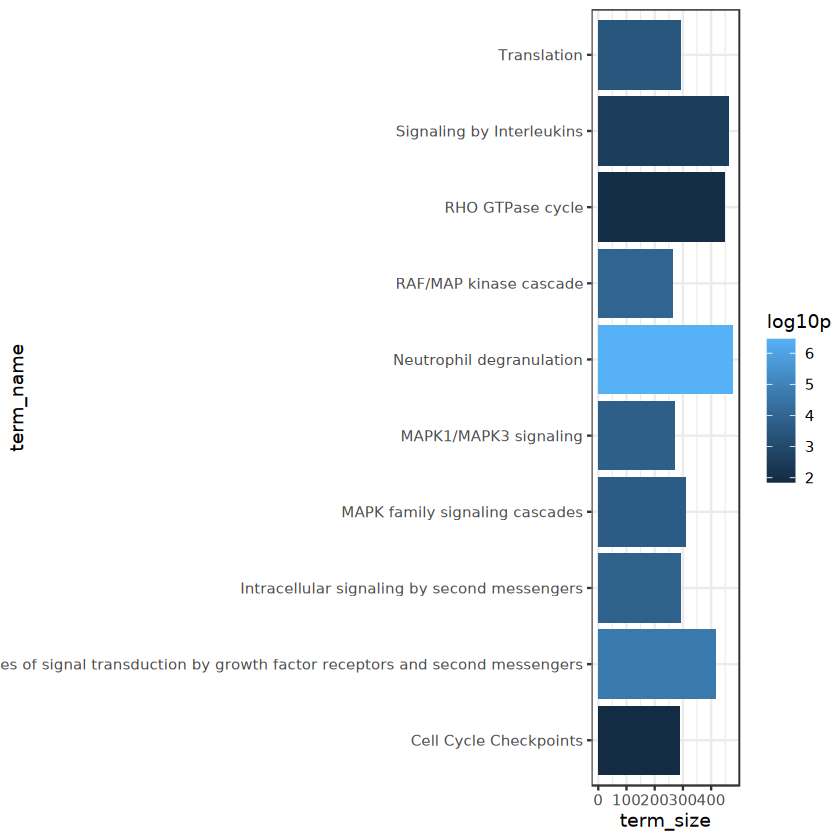

In [30]:
enriched_pws |>
select("term_name", "term_size", "adjusted_p_val") |>
arrange(desc(term_size)) |>
mutate(log10p = -log10(adjusted_p_val)) |>
head(10) |>
ggplot(aes(x = term_name, y = term_size, fill = log10p)) +
geom_bar(position = "dodge", stat = "identity") +
coord_flip() +
theme_bw()

In [31]:
sessionInfo()

R version 4.4.3 (2025-02-28)
Platform: x86_64-conda-linux-gnu
Running under: SUSE Linux Enterprise Server 15 SP6

Matrix products: default
BLAS/LAPACK: /nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/software/miniforge3/envs/jupyter/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.4      forcats_1.0.0        stringr_1.5.1       
 [4] dplyr_1.1.4          purrr_1.1.0          readr_2.1.5         
 [7] tidyr_1.3.1          tibbl